In [11]:
import numpy as np
from sklearn.manifold import TSNE
import torch
from transformers import BertConfig, BertModel, BertTokenizer
from transformers import BertForMaskedLM, BertTokenizerFast, pipeline
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from umap import UMAP

In [2]:
config = BertConfig.from_json_file("config.json")
model = BertForMaskedLM.from_pretrained('/home/customer/hyr/matbert-uncasedÔºàcopy-versionÔºâ')
tokenizer = BertTokenizerFast.from_pretrained('/home/customer/hyr/matbert-uncasedÔºàcopy-versionÔºâ', do_lower_case=False)
# unmasker = pipeline('fill-mask', model=model, tokenizer=tokenizer)

In [9]:
# # ÊèêÂèñÊâÄÊúâËØçÂêëÈáè
# all_word_embeddings = []
# for word in tokenizer.vocab.keys():
#     if word.isalnum():  # Âè™ÈÄâÊã©Â≠óÊØçÊï∞Â≠óÁªÑÂêàÁöÑËØçÔºåÊéíÈô§ÁâπÊÆäÊ†áËÆ∞
#         token_id = tokenizer.encode(word, add_special_tokens=False)
#         if len(token_id) == 1:  # Á°Æ‰øùËØçÊ≤°ÊúâÂàÜËØçÊàêÂ§ö‰∏™Â≠êËØç
#             token_id = torch.tensor(token_id).unsqueeze(0)
#             embeddings = model.bert.embeddings.word_embeddings(token_id)
#             all_word_embeddings.append(embeddings.squeeze().detach().numpy())

# all_word_embeddings = np.array(all_word_embeddings)

In [14]:

# from umap import UMAP
# # ‰ΩøÁî®UMAPËøõË°åÈôçÁª¥
# reducer = UMAP()
# embeddings_umap = reducer.fit_transform(all_word_embeddings)


In [27]:
# # ÂèØËßÜÂåñÈôçÁª¥ÂêéÁöÑËØçÂêëÈáè
# plt.figure(figsize=(10, 8))
# plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], s=10)
# plt.title('UMAP Visualization of BERT Word Embeddings')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.show()

In [ ]:
# ----------------------------------------------------------

In [17]:
# ÊèêÂèñÊâÄÊúâËØçÂêëÈáè
all_word_embeddings = []
all_words = []
for word in tokenizer.vocab.keys():
    if word.isalnum():  # Âè™ÈÄâÊã©Â≠óÊØçÊï∞Â≠óÁªÑÂêàÁöÑËØçÔºåÊéíÈô§ÁâπÊÆäÊ†áËÆ∞
        token_id = tokenizer.encode(word, add_special_tokens=False)
        if len(token_id) == 1:  # Á°Æ‰øùËØçÊ≤°ÊúâÂàÜËØçÊàêÂ§ö‰∏™Â≠êËØç
            token_id = torch.tensor(token_id).unsqueeze(0)
            embeddings = model.bert.embeddings.word_embeddings(token_id)
            all_word_embeddings.append(embeddings.squeeze().detach().numpy())
            all_words.append(word)

all_word_embeddings = np.array(all_word_embeddings)




In [19]:
from umap import UMAP
# ‰ΩøÁî®UMAPËøõË°åÈôçÁª¥
reducer = UMAP()
embeddings_umap = reducer.fit_transform(all_word_embeddings)


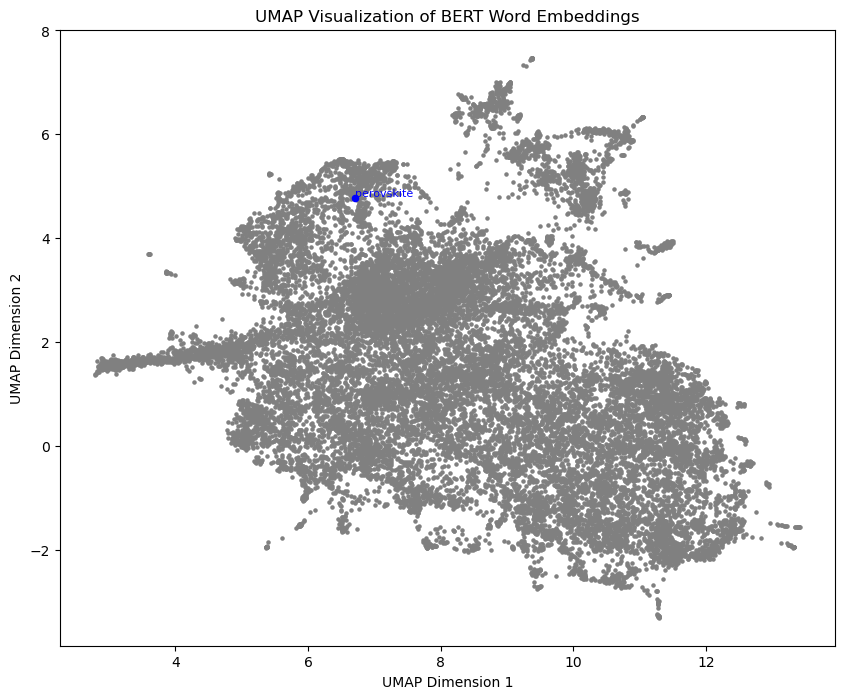

In [22]:
# ÂèØËßÜÂåñÈôçÁª¥ÂêéÁöÑËØçÂêëÈáè
plt.figure(figsize=(10, 8))
for i in range(len(all_words)):
    plt.scatter(embeddings_umap[i, 0], embeddings_umap[i, 1], color='gray', s=5)

# Ê†áËÆ∞È´ò‰∫ÆËØçÊ±á
for word in highlighted_words:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='blue', s=20)
        plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='blue')

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


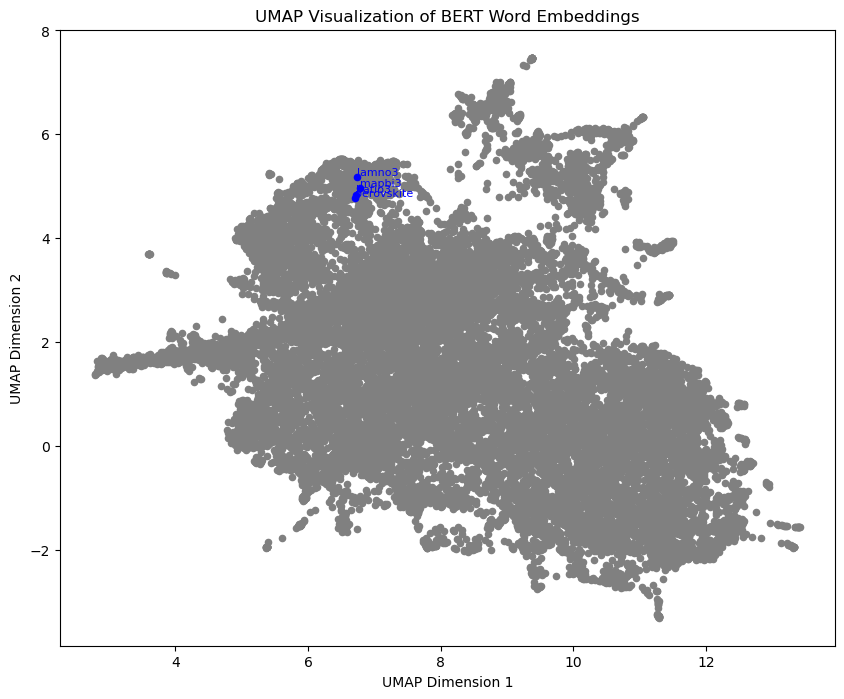

In [26]:
highlighted_words = ['perovskite','mapbi3','lamno3','batio3']
# ÂèØËßÜÂåñÈôçÁª¥ÂêéÁöÑËØçÂêëÈáè
plt.figure(figsize=(10, 8))
for i in range(len(all_words)):
    plt.scatter(embeddings_umap[i, 0], embeddings_umap[i, 1], color='gray', s=20)

# Ê†áËÆ∞È´ò‰∫ÆËØçÊ±á
for word in highlighted_words:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='blue', s=20)
        plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='blue')

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.savefig('allword_highlight.png')
plt.show()


In [30]:
from sklearn.metrics.pairwise import cosine_similarity
# ËÆ°ÁÆóÊâÄÊúâËØçÂêëÈáè‰∏é"perovskite"ÁöÑ‰ΩôÂº¶Áõ∏‰ººÂ∫¶
perovskite_token = tokenizer.encode("perovskite", add_special_tokens=False)
perovskite_embedding = model.bert.embeddings.word_embeddings(torch.tensor(perovskite_token)).squeeze().detach().numpy()
cos_similarities = cosine_similarity(all_word_embeddings, [perovskite_embedding])


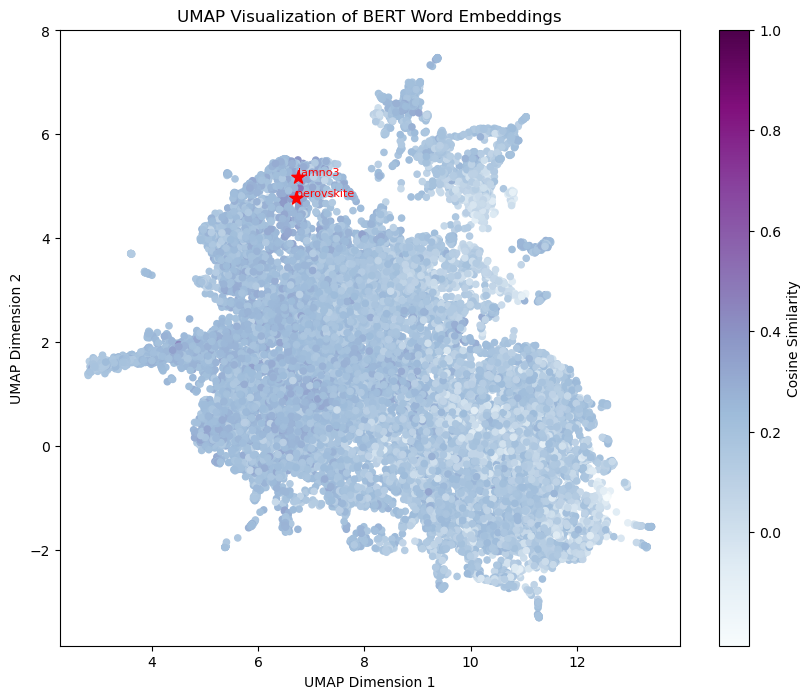

In [40]:
# ÂèØËßÜÂåñÈôçÁª¥ÂêéÁöÑËØçÂêëÈáèÔºåÂπ∂Ê†πÊçÆ‰ΩôÂº¶Áõ∏‰ººÂ∫¶Ë∞ÉÊï¥È¢úËâ≤Ê∑±ÊµÖ
plt.figure(figsize=(10, 8))
cmap = plt.cm.BuPu
scatter=plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=cos_similarities.squeeze(), cmap=cmap, s=20)

# Ê†áËÆ∞È´ò‰∫ÆËØçÊ±á
highlighted_words = ["perovskite", "lamno3"]
for word in highlighted_words:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='red', marker='*', s=100)
        plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='red')

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Ê∑ªÂä†È¢úËâ≤Êù°
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# ËÆæÁΩÆÈ¢úËâ≤Êù°ÁöÑËåÉÂõ¥Ôºå‰ΩøÂÖ∂Âè™ÊòæÁ§∫ËìùËâ≤ÈÉ®ÂàÜ
cbar.set_ticks(np.linspace(0, 1, 6))

# plt.axis([-50, 50, -60, 60])




plt.savefig("word_embeddings_visualization.png")
plt.show()

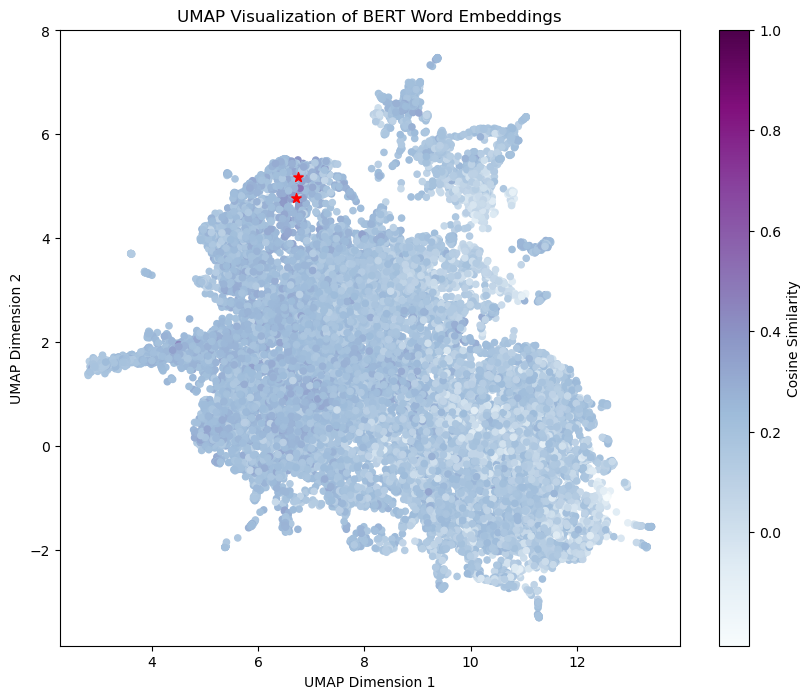

In [62]:
# ÂèØËßÜÂåñÈôçÁª¥ÂêéÁöÑËØçÂêëÈáèÔºåÂπ∂Ê†πÊçÆ‰ΩôÂº¶Áõ∏‰ººÂ∫¶Ë∞ÉÊï¥È¢úËâ≤Ê∑±ÊµÖ
plt.figure(figsize=(10, 8))

# plt.cm.Blues: ËìùËâ≤Ë∞ÉËâ≤Êùø
# plt.cm.Greens: ÁªøËâ≤Ë∞ÉËâ≤Êùø
# plt.cm.Reds: Á∫¢Ëâ≤Ë∞ÉËâ≤Êùø
# plt.cm.Oranges: Ê©ôËâ≤Ë∞ÉËâ≤Êùø
# plt.cm.Purples: Á¥´Ëâ≤Ë∞ÉËâ≤Êùø
# plt.cm.Greys: ÁÅ∞Ëâ≤Ë∞ÉËâ≤Êùø
# plt.cm.YlOrBr: ÈªÑÊ©ôÊ£ïËâ≤Ë∞ÉËâ≤Êùø
# plt.cm.YlOrRd: ÈªÑÊ©ôÁ∫¢Ëâ≤Ë∞ÉËâ≤Êùø
# marker='o',marker='s'marker='^'„ÄÅmarker='v'„ÄÅmarker='<'„ÄÅmarker='>' marker='+'marker='x'
cmap = plt.cm.BuPu
scatter=plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=cos_similarities.squeeze(), cmap=cmap, s=20)

# Ê†áËÆ∞È´ò‰∫ÆËØçÊ±á
highlighted_words = ["perovskite", "lamno3"]
for word in highlighted_words:
    if word in all_words:
        idx = all_words.index(word)
        plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color='red', marker='*',s=50)
        # plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color='red')

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Ê∑ªÂä†È¢úËâ≤Êù°
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# ËÆæÁΩÆÈ¢úËâ≤Êù°ÁöÑËåÉÂõ¥Ôºå‰ΩøÂÖ∂Âè™ÊòæÁ§∫ËìùËâ≤ÈÉ®ÂàÜ
cbar.set_ticks(np.linspace(0, 1, 6))

# plt.axis([-50, 50, -60, 60])

plt.savefig("word_embeddings_visualization.png")
plt.show()

In [60]:
 # ÁõÆÊ†áËØçÊ±á1
word3_token = tokenizer.encode("perovskite", add_special_tokens=False)
word3_embedding = model.bert.embeddings.word_embeddings(torch.tensor(word3_token)).squeeze().detach().numpy()
cos_word3 = cosine_similarity(all_word_embeddings, [word3_embedding])
 # ÁõÆÊ†áËØçÊ±á2
word4_token = tokenizer.encode("stable", add_special_tokens=False)
word4_embedding = model.bert.embeddings.word_embeddings(torch.tensor(word4_token)).squeeze().detach().numpy()
cos_word4 = cosine_similarity(all_word_embeddings, [stable_embedding])

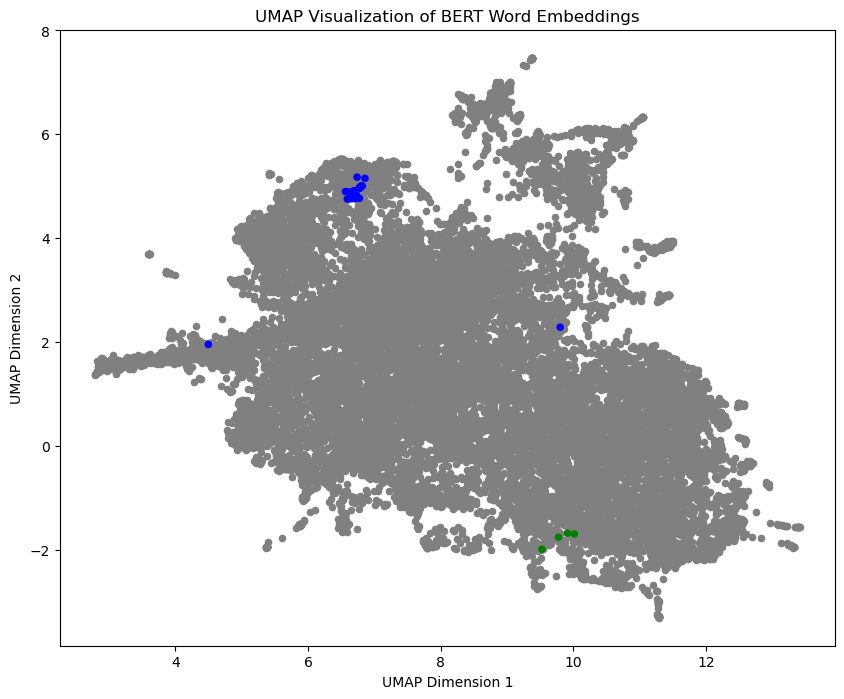

In [61]:
plt.figure(figsize=(10, 8))
# ÂÖàÁªòÂà∂ÁÅ∞Ëâ≤ÁöÑÁÇπ
gray_indices = [i for i in range(len(all_words)) if cos_word3[i] <= 0.4 and cos_word4[i] <= 0.4]
gray_embeddings_umap = embeddings_umap[gray_indices]
plt.scatter(gray_embeddings_umap[:, 0], gray_embeddings_umap[:, 1], color='gray', s=20)

# ÂÜçÁªòÂà∂È´ò‰∫ÆÁöÑÁÇπ
highlighted_indices = [i for i in range(len(all_words)) if i not in gray_indices]
highlighted_embeddings_umap = embeddings_umap[highlighted_indices]
highlighted_colors = ['blue' if cos_word3[i] > 0.4 else 'green' for i in highlighted_indices]
plt.scatter(highlighted_embeddings_umap[:, 0], highlighted_embeddings_umap[:, 1], c=highlighted_colors, s=20)

# # Ê†áËÆ∞È´ò‰∫ÆËØçÊ±á
# highlighted_words = ["perovskite", "lamno3", "stable"]
# highlighted_colors = ['blue', 'red', 'green']
# for word, color in zip(highlighted_words, highlighted_colors):
#     if word in all_words:
#         idx = all_words.index(word)
#         plt.scatter(embeddings_umap[idx, 0], embeddings_umap[idx, 1], color=color, s=20)
#         plt.text(embeddings_umap[idx, 0], embeddings_umap[idx, 1], word, fontsize=8, ha='left', va='bottom', color=color)

plt.title('UMAP Visualization of BERT Word Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.savefig("word_embeddings_visualization.png")
plt.show()


In [67]:
# ÂÆö‰πâË¶ÅÊØîËæÉÁöÑËØç
target_word1 = "htl"
# ËÆ°ÁÆóÁõÆÊ†áËØç‰∏éÊâÄÊúâÂÖ∂‰ªñËØçÁöÑ‰ΩôÂº¶Áõ∏‰ººÂ∫¶
target_token_id = tokenizer.encode(target_word1, add_special_tokens=False)
target_embedding = model.bert.embeddings.word_embeddings(torch.tensor(target_token_id)).squeeze().detach().numpy()
cos_similarities2 = cosine_similarity(all_word_embeddings, [target_embedding])
# ÂØπÁõ∏‰ººÂ∫¶ËøõË°åÊéíÂ∫èÂπ∂Ëé∑ÂèñÊéíÂ∫èÂêéÁöÑÁ¥¢Âºï
sorted_indices = np.argsort(cos_similarities2.flatten())[::-1]

# ÊâìÂç∞ÊéíÂêçÂíåÁõ∏‰ººÂ∫¶
print("cosine similarity for '{}':".format(target_word1))
for rank, idx in enumerate(sorted_indices):
    word = all_words[idx]
    similarity = cos_similarities2[idx][0]
    print("{}: {} (Cosine Similarity: {:.4f})".format(rank + 1, word, similarity))

cosine similarity for 'htl':
1: htl (Cosine Similarity: 1.0000)
2: etl (Cosine Similarity: 0.5385)
3: htm (Cosine Similarity: 0.4725)
4: htc (Cosine Similarity: 0.4686)
5: dewatering (Cosine Similarity: 0.4682)
6: 371 (Cosine Similarity: 0.4509)
7: hydrotalcite (Cosine Similarity: 0.4470)
8: npb (Cosine Similarity: 0.4468)
9: dewater (Cosine Similarity: 0.4440)
10: blad (Cosine Similarity: 0.4422)
11: hhv (Cosine Similarity: 0.4405)
12: calcining (Cosine Similarity: 0.4393)
13: mpl (Cosine Similarity: 0.4374)
14: 379 (Cosine Similarity: 0.4366)
15: ctl (Cosine Similarity: 0.4355)
16: interlayers (Cosine Similarity: 0.4323)
17: lsmo (Cosine Similarity: 0.4313)
18: jatropha (Cosine Similarity: 0.4292)
19: biorefinery (Cosine Similarity: 0.4287)
20: oled (Cosine Similarity: 0.4259)
21: mapbi3 (Cosine Similarity: 0.4247)
22: bioref (Cosine Similarity: 0.4245)
23: teph (Cosine Similarity: 0.4238)
24: commercialization (Cosine Similarity: 0.4214)
25: heterocyc (Cosine Similarity: 0.4211)
26: